# Import Libraries

In [ ]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
# Install kmodes if you have not yet
!pip install kmodes

# Import kmodes
from kmodes.kmodes import KModes

# Import Data

In [ ]:
df = pd.read_csv("semua-data.csv")
df.head()

,Nama,Majelis,EQ-1,EQ-2,EQ-9,EQ-13,EQ-7,EQ-8,EQ-4,EQ-6,...,CQ-16,CQ-17,CQ-18,CQ-19,CQ-20,CQ-21,CQ-22,CQ-23,CQ-24,CQ-25
0,ID-1,19B,1,2,1,2,2,3,2,2,...,3,3,3,3,3,3,3,3,3,3
1,ID-2,Hakim Tunggal,3,2,1,3,2,2,1,2,...,3,3,2,1,2,3,3,3,2,3
2,ID-3,X,2,2,1,3,3,3,2,3,...,3,3,2,1,2,3,3,3,1,3
3,ID-4,5,3,2,2,2,2,2,3,2,...,3,3,3,2,2,3,3,3,2,3
4,ID-5,M2,3,2,1,3,2,3,3,2,...,2,3,3,1,3,3,3,2,2,3


In [ ]:
X = df.copy().drop(["Nama", "Majelis"], axis=1)
X.head()

,EQ-1,EQ-2,EQ-9,EQ-13,EQ-7,EQ-8,EQ-4,EQ-6,EQ-3,EQ-5,...,CQ-16,CQ-17,CQ-18,CQ-19,CQ-20,CQ-21,CQ-22,CQ-23,CQ-24,CQ-25
0,1,2,1,2,2,3,2,2,2,2,...,3,3,3,3,3,3,3,3,3,3
1,3,2,1,3,2,2,1,2,2,2,...,3,3,2,1,2,3,3,3,2,3
2,2,2,1,3,3,3,2,3,2,3,...,3,3,2,1,2,3,3,3,1,3
3,3,2,2,2,2,2,3,2,3,2,...,3,3,3,2,2,3,3,3,2,3
4,3,2,1,3,2,3,3,2,3,2,...,2,3,3,1,3,3,3,2,2,3


- After getting the columns we wanted, let's check the shape of the DataFrame.

In [ ]:
print("columns: ", X.shape[1])
print("rows: ", X.shape[0])

columns:  39
rows:  49


In [ ]:
X.duplicated().sum()

0

In [ ]:
X.isnull().sum()

EQ-1     0
EQ-2     0
EQ-9     0
EQ-13    0
EQ-7     0
EQ-8     0
EQ-4     0
EQ-6     0
EQ-3     0
EQ-5     0
EQ-10    0
EQ-11    0
EQ-12    0
EQ-14    0
CQ-1     0
CQ-2     0
CQ-3     0
CQ-4     0
CQ-5     0
CQ-6     0
CQ-7     0
CQ-8     0
CQ-9     0
CQ-10    0
CQ-11    0
CQ-12    0
CQ-13    0
CQ-14    0
CQ-15    0
CQ-16    0
CQ-17    0
CQ-18    0
CQ-19    0
CQ-20    0
CQ-21    0
CQ-22    0
CQ-23    0
CQ-24    0
CQ-25    0
dtype: int64

In [ ]:
X.dtypes

EQ-1     int64
EQ-2     int64
EQ-9     int64
EQ-13    int64
EQ-7     int64
EQ-8     int64
EQ-4     int64
EQ-6     int64
EQ-3     int64
EQ-5     int64
EQ-10    int64
EQ-11    int64
EQ-12    int64
EQ-14    int64
CQ-1     int64
CQ-2     int64
CQ-3     int64
CQ-4     int64
CQ-5     int64
CQ-6     int64
CQ-7     int64
CQ-8     int64
CQ-9     int64
CQ-10    int64
CQ-11    int64
CQ-12    int64
CQ-13    int64
CQ-14    int64
CQ-15    int64
CQ-16    int64
CQ-17    int64
CQ-18    int64
CQ-19    int64
CQ-20    int64
CQ-21    int64
CQ-22    int64
CQ-23    int64
CQ-24    int64
CQ-25    int64
dtype: object

In [ ]:
# List categorical columns
cat_cols = X.columns.to_list()

# Loop each element within the list to be changed into the type `category`
for col in cat_cols:
    X[col] = X[col].astype('category')

# Check data types again
X.dtypes

EQ-1     category
EQ-2     category
EQ-9     category
EQ-13    category
EQ-7     category
EQ-8     category
EQ-4     category
EQ-6     category
EQ-3     category
EQ-5     category
EQ-10    category
EQ-11    category
EQ-12    category
EQ-14    category
CQ-1     category
CQ-2     category
CQ-3     category
CQ-4     category
CQ-5     category
CQ-6     category
CQ-7     category
CQ-8     category
CQ-9     category
CQ-10    category
CQ-11    category
CQ-12    category
CQ-13    category
CQ-14    category
CQ-15    category
CQ-16    category
CQ-17    category
CQ-18    category
CQ-19    category
CQ-20    category
CQ-21    category
CQ-22    category
CQ-23    category
CQ-24    category
CQ-25    category
dtype: object

# Clustering using K-Modes

- In this step, we want to feed the data that we have into K-Modes algorithm.

- The K-Modes algorithm is a modification of K-Means more suited for categorical data. Instead of calculating the Euclidean distance between the datapoints and cluster centers, in K-Modes, a dissimilarity measure is used, which is defined as the number of features of the datapoint whose values do not match those of the cluster center. Also, the cluster centers are updated using the mode of the datapoints assigned to each cluster, instead of the mean.


- To make sure that the original data is still intact, we first copy the data into a new DataFrame called `data_kmodes`.

In [ ]:
data_kmodes = X.copy()
data_kmodes.head()

,EQ-1,EQ-2,EQ-9,EQ-13,EQ-7,EQ-8,EQ-4,EQ-6,EQ-3,EQ-5,...,CQ-16,CQ-17,CQ-18,CQ-19,CQ-20,CQ-21,CQ-22,CQ-23,CQ-24,CQ-25
0,1,2,1,2,2,3,2,2,2,2,...,3,3,3,3,3,3,3,3,3,3
1,3,2,1,3,2,2,1,2,2,2,...,3,3,2,1,2,3,3,3,2,3
2,2,2,1,3,3,3,2,3,2,3,...,3,3,2,1,2,3,3,3,1,3
3,3,2,2,2,2,2,3,2,3,2,...,3,3,3,2,2,3,3,3,2,3
4,3,2,1,3,2,3,3,2,3,2,...,2,3,3,1,3,3,3,2,2,3


## One-hot encoding

- What is one-hot encoding? Brief

- Use `pd.get_dummies()` to perform one-hot encoding.

In [ ]:
data_kmodes.head()

,EQ-1,EQ-2,EQ-9,EQ-13,EQ-7,EQ-8,EQ-4,EQ-6,EQ-3,EQ-5,...,CQ-16,CQ-17,CQ-18,CQ-19,CQ-20,CQ-21,CQ-22,CQ-23,CQ-24,CQ-25
0,1,2,1,2,2,3,2,2,2,2,...,3,3,3,3,3,3,3,3,3,3
1,3,2,1,3,2,2,1,2,2,2,...,3,3,2,1,2,3,3,3,2,3
2,2,2,1,3,3,3,2,3,2,3,...,3,3,2,1,2,3,3,3,1,3
3,3,2,2,2,2,2,3,2,3,2,...,3,3,3,2,2,3,3,3,2,3
4,3,2,1,3,2,3,3,2,3,2,...,2,3,3,1,3,3,3,2,2,3


In [ ]:
print(data_kmodes.shape)

(49, 39)


In [ ]:
data_kmodes = pd.get_dummies(data_kmodes, drop_first=False)
data_kmodes.head()

,EQ-1_1,EQ-1_2,EQ-1_3,EQ-2_1,EQ-2_2,EQ-2_3,EQ-9_1,EQ-9_2,EQ-13_2,EQ-13_3,...,CQ-22_1,CQ-22_2,CQ-22_3,CQ-23_2,CQ-23_3,CQ-24_1,CQ-24_2,CQ-24_3,CQ-25_2,CQ-25_3
0,1,0,0,0,1,0,1,0,1,0,...,0,0,1,0,1,0,0,1,0,1
1,0,0,1,0,1,0,1,0,0,1,...,0,0,1,0,1,0,1,0,0,1
2,0,1,0,0,1,0,1,0,0,1,...,0,0,1,0,1,1,0,0,0,1
3,0,0,1,0,1,0,0,1,1,0,...,0,0,1,0,1,0,1,0,0,1
4,0,0,1,0,1,0,1,0,0,1,...,0,0,1,1,0,0,1,0,0,1


- Now print out the new shape of `data_kmodes`.

- Pay attention on how the dimension vastly changed.

- How do you think it will affect the processing time of the algorithm?

In [ ]:
print(data_kmodes.shape)

(49, 106)


## Feeding the Data into the Algorithm

- Now that the data is ready, we can feed it to the algorithm.

- To find the number of clusters, we need to simulate different scenarios. In this case, we want to simulate what would happen if we cluster the data into 2 to 8 clusters.

- The algorithm will then loop around the simulation per cluster and we save the `Cost` for each cluster.

- The cost of the K-Modes algorithm is defined as the sum of the dissimilarities of each datapoint.

- We aim to find clusters with low `Cost`.

- But if we choose the biggest possible number of cluster, it will cost us a lot in processing power and time.

- So we should aim for the sweet spot where we get low `Cost` and quick processing time.

- This is where the `elbow method` comes in. Find the number of cluster where the diminishing value of `Cost` starts to get lower.

In [ ]:
# Running the K-Modes algorithm for different numbers of clusters:

n_clusters = list(range(2, 9))
costs = []

for n in n_clusters:
    kmodes = KModes(n_clusters=n, init='random', n_init=10, max_iter=500, random_state=42)
    kmodes.fit(data_kmodes)
    cost = kmodes.cost_
    costs.append(cost)

- Plot the simulation result of `cost` vs `number of cluster`.

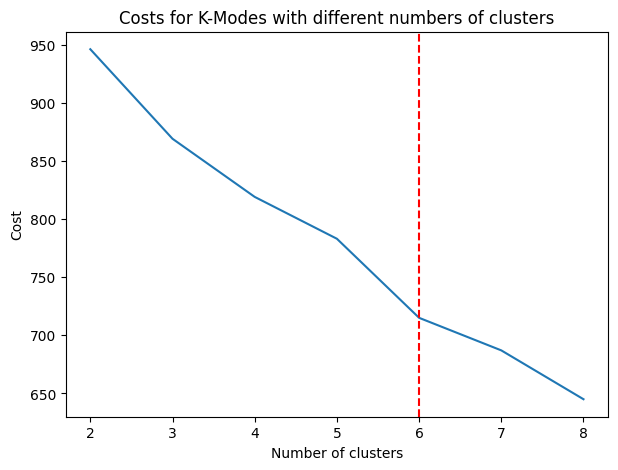

In [ ]:
# Plotting the cost:

plt.figure(figsize=(7,5))
plt.plot(n_clusters, costs)
plt.axvline(6, linestyle='--', c='r')
plt.xlabel('Number of clusters')
plt.ylabel('Cost')
plt.title('Costs for K-Modes with different numbers of clusters')
plt.show()

- We choose 4 clusters based on the elbow method.

## Label the Original Data

- by using `.fit_predict()` function

In [ ]:
kmodes = KModes(n_clusters=6, init='random', n_init=10, max_iter=500, random_state=42)
df['cluster_k-modes'] = kmodes.fit_predict(data_kmodes)

In [ ]:
# rename the clustername
df['cluster_k-modes']=df['cluster_k-modes'].replace(0,'first cluster')
df['cluster_k-modes']=df['cluster_k-modes'].replace(1,'second cluster')
df['cluster_k-modes']=df['cluster_k-modes'].replace(2,'third cluster')
df['cluster_k-modes']=df['cluster_k-modes'].replace(3,'fourth cluster')
df['cluster_k-modes']=df['cluster_k-modes'].replace(4,'fifth cluster')
df['cluster_k-modes']=df['cluster_k-modes'].replace(5,'sixth cluster')

In [ ]:
first_cluster = df[(df['cluster_k-modes'] == 'first cluster')]
first_cluster

,Nama,Majelis,EQ-1,EQ-2,EQ-9,EQ-13,EQ-7,EQ-8,EQ-4,EQ-6,...,CQ-17,CQ-18,CQ-19,CQ-20,CQ-21,CQ-22,CQ-23,CQ-24,CQ-25,cluster_k-modes
2,ID-3,X,2,2,1,3,3,3,2,3,...,3,2,1,2,3,3,3,1,3,first cluster
9,ID-10,XB,3,2,1,3,3,3,3,3,...,3,2,1,2,3,3,3,2,3,first cluster
11,ID-12,17,3,2,1,2,1,3,1,1,...,3,2,2,3,3,3,2,1,3,first cluster
14,ID-15,IA,3,2,1,3,3,3,3,3,...,3,3,2,3,3,3,3,2,3,first cluster
20,ID-21,NaN,2,2,2,3,3,2,3,3,...,3,2,2,3,3,3,3,1,3,first cluster
26,ID-27,8A,3,2,1,3,1,3,3,1,...,3,3,1,3,3,3,3,2,3,first cluster
29,ID-30,X,3,2,1,3,2,2,3,2,...,3,2,2,2,3,3,3,2,3,first cluster
30,ID-31,VII A dan XII B,3,3,1,3,3,3,1,3,...,3,3,1,3,3,3,3,2,3,first cluster
31,ID-32,IV,3,2,1,3,1,3,1,1,...,3,3,1,2,3,3,3,2,3,first cluster
32,ID-33,VII B & XX A,3,2,1,3,1,1,3,1,...,3,1,1,3,3,3,3,2,3,first cluster


In [ ]:
for col in cat_cols:
    print(f'{col}:')
    print(first_cluster[col].unique())
    print('\n')

EQ-1:
[2 3]


EQ-2:
[2 3]


EQ-9:
[1 2]


EQ-13:
[3 2]


EQ-7:
[3 1 2]


EQ-8:
[3 2 1]


EQ-4:
[2 3 1]


EQ-6:
[3 1 2]


EQ-3:
[2 3 1]


EQ-5:
[3 1 2]


EQ-10:
[3 2 1]


EQ-11:
[3 2]


EQ-12:
[3 2 1]


EQ-14:
[3 1]


CQ-1:
[3 2]


CQ-2:
[3 2 1]


CQ-3:
[3]


CQ-4:
[1 2]


CQ-5:
[3 2 1]


CQ-6:
[3]


CQ-7:
[3 2]


CQ-8:
[3 2]


CQ-9:
[2 3]


CQ-10:
[3 2]


CQ-11:
[3]


CQ-12:
[1 2]


CQ-13:
[1 2 3]


CQ-14:
[2 1]


CQ-15:
[3 2 1]


CQ-16:
[3]


CQ-17:
[3]


CQ-18:
[2 3 1]


CQ-19:
[1 2]


CQ-20:
[2 3]


CQ-21:
[3]


CQ-22:
[3]


CQ-23:
[3 2]


CQ-24:
[1 2]


CQ-25:
[3]




In [ ]:
second_cluster = df[(df['cluster_k-modes'] == 'second cluster')]
second_cluster.head()

,Nama,Majelis,EQ-1,EQ-2,EQ-9,EQ-13,EQ-7,EQ-8,EQ-4,EQ-6,...,CQ-17,CQ-18,CQ-19,CQ-20,CQ-21,CQ-22,CQ-23,CQ-24,CQ-25,cluster_k-modes
1,ID-2,Hakim Tunggal,3,2,1,3,2,2,1,2,...,3,2,1,2,3,3,3,2,3,second cluster
5,ID-6,M3B,1,2,1,3,2,2,2,2,...,3,2,2,3,3,3,3,2,3,second cluster
8,ID-9,Majelis 11,2,2,1,3,2,2,2,2,...,3,2,1,3,3,3,3,1,3,second cluster
13,ID-14,NaN,3,2,1,3,2,3,2,2,...,3,2,2,3,3,3,3,1,3,second cluster
16,ID-17,13,1,2,1,3,2,3,2,2,...,3,2,1,3,3,3,3,2,3,second cluster


In [ ]:
second_cluster.shape

(14, 42)

In [ ]:
for col in cat_cols:
    print(f'{col}:')
    print(second_cluster[col].unique())
    print('\n')

EQ-1:
[3 1 2]


EQ-2:
[2 3]


EQ-9:
[1]


EQ-13:
[3 2]


EQ-7:
[2 1]


EQ-8:
[2 3 1]


EQ-4:
[1 2]


EQ-6:
[2 1]


EQ-3:
[2 1]


EQ-5:
[2 1]


EQ-10:
[2 3 1]


EQ-11:
[3 2 1]


EQ-12:
[2 1 3]


EQ-14:
[1 3]


CQ-1:
[3]


CQ-2:
[3 2]


CQ-3:
[3]


CQ-4:
[2 3 1]


CQ-5:
[2 3]


CQ-6:
[3]


CQ-7:
[3 2]


CQ-8:
[3]


CQ-9:
[2 1]


CQ-10:
[3 2]


CQ-11:
[3 2]


CQ-12:
[2 1]


CQ-13:
[3 2 1]


CQ-14:
[2 1 3]


CQ-15:
[3 2]


CQ-16:
[3 2]


CQ-17:
[3 2]


CQ-18:
[2 3 1]


CQ-19:
[1 2]


CQ-20:
[2 3]


CQ-21:
[3 2]


CQ-22:
[3]


CQ-23:
[3 2]


CQ-24:
[2 1 3]


CQ-25:
[3]




In [ ]:
third_cluster = df[(df['cluster_k-modes'] == 'third cluster')]
third_cluster.head()

,Nama,Majelis,EQ-1,EQ-2,EQ-9,EQ-13,EQ-7,EQ-8,EQ-4,EQ-6,...,CQ-17,CQ-18,CQ-19,CQ-20,CQ-21,CQ-22,CQ-23,CQ-24,CQ-25,cluster_k-modes
4,ID-5,M2,3,2,1,3,2,3,3,2,...,3,3,1,3,3,3,2,2,3,third cluster
6,ID-7,XI,3,2,1,3,2,3,3,2,...,3,2,1,2,3,3,2,2,3,third cluster
10,ID-11,18,3,2,1,3,2,3,3,2,...,3,2,1,2,3,3,2,2,3,third cluster
28,ID-29,3A,3,2,1,3,3,2,2,3,...,3,2,2,2,2,2,2,2,3,third cluster
46,ID-47,XIVA,3,2,1,3,2,3,3,2,...,3,2,1,2,3,3,3,2,3,third cluster


In [ ]:
third_cluster.shape

(5, 42)

In [ ]:
for col in cat_cols:
    print(f'{col}:')
    print(third_cluster[col].unique())
    print('\n')

EQ-1:
[3]


EQ-2:
[2]


EQ-9:
[1]


EQ-13:
[3]


EQ-7:
[2 3]


EQ-8:
[3 2]


EQ-4:
[3 2]


EQ-6:
[2 3]


EQ-3:
[3 2]


EQ-5:
[2 3]


EQ-10:
[3 2]


EQ-11:
[3 2]


EQ-12:
[1 2 3]


EQ-14:
[1 3]


CQ-1:
[3]


CQ-2:
[2 3]


CQ-3:
[3]


CQ-4:
[2 1 3]


CQ-5:
[3 2]


CQ-6:
[3]


CQ-7:
[3 2 1]


CQ-8:
[3 2]


CQ-9:
[2]


CQ-10:
[3 2]


CQ-11:
[2 3]


CQ-12:
[2 1]


CQ-13:
[2 1]


CQ-14:
[1]


CQ-15:
[3 2]


CQ-16:
[2 3]


CQ-17:
[3]


CQ-18:
[3 2]


CQ-19:
[1 2]


CQ-20:
[3 2]


CQ-21:
[3 2]


CQ-22:
[3 2]


CQ-23:
[2 3]


CQ-24:
[2]


CQ-25:
[3]




In [ ]:
fourth_cluster = df[(df['cluster_k-modes'] == 'fourth cluster')]
fourth_cluster.head()

,Nama,Majelis,EQ-1,EQ-2,EQ-9,EQ-13,EQ-7,EQ-8,EQ-4,EQ-6,...,CQ-17,CQ-18,CQ-19,CQ-20,CQ-21,CQ-22,CQ-23,CQ-24,CQ-25,cluster_k-modes
0,ID-1,19B,1,2,1,2,2,3,2,2,...,3,3,3,3,3,3,3,3,3,fourth cluster
3,ID-4,5,3,2,2,2,2,2,3,2,...,3,3,2,2,3,3,3,2,3,fourth cluster
12,ID-13,XXB,3,2,1,2,2,2,2,2,...,3,3,1,3,3,3,3,1,3,fourth cluster
25,ID-26,NaN,3,2,1,3,1,1,3,1,...,3,3,3,3,3,3,3,3,3,fourth cluster
27,ID-28,NaN,3,2,1,3,2,2,3,2,...,3,3,3,3,3,3,3,3,3,fourth cluster


In [ ]:
fourth_cluster.shape

(6, 42)

In [ ]:
for col in cat_cols:
    print(f'{col}:')
    print(fourth_cluster[col].unique())
    print('\n')

EQ-1:
[1 3]


EQ-2:
[2]


EQ-9:
[1 2]


EQ-13:
[2 3]


EQ-7:
[2 1]


EQ-8:
[3 2 1]


EQ-4:
[2 3]


EQ-6:
[2 1]


EQ-3:
[2 3]


EQ-5:
[2 1]


EQ-10:
[3 1 2]


EQ-11:
[2 3]


EQ-12:
[2 1 3]


EQ-14:
[1 3 2]


CQ-1:
[3]


CQ-2:
[3]


CQ-3:
[3]


CQ-4:
[3]


CQ-5:
[3]


CQ-6:
[3]


CQ-7:
[3]


CQ-8:
[3]


CQ-9:
[3]


CQ-10:
[3]


CQ-11:
[3]


CQ-12:
[3 1]


CQ-13:
[3 1]


CQ-14:
[3 1]


CQ-15:
[3 1]


CQ-16:
[3]


CQ-17:
[3]


CQ-18:
[3]


CQ-19:
[3 2 1]


CQ-20:
[3 2]


CQ-21:
[3]


CQ-22:
[3]


CQ-23:
[3]


CQ-24:
[3 2 1]


CQ-25:
[3]




In [ ]:
fifth_cluster = df[(df['cluster_k-modes'] == 'fifth cluster')]
fifth_cluster

,Nama,Majelis,EQ-1,EQ-2,EQ-9,EQ-13,EQ-7,EQ-8,EQ-4,EQ-6,...,CQ-17,CQ-18,CQ-19,CQ-20,CQ-21,CQ-22,CQ-23,CQ-24,CQ-25,cluster_k-modes
7,ID-8,15,1,1,1,3,2,3,2,2,...,2,2,2,2,3,1,2,2,2,fifth cluster
22,ID-23,18,1,1,1,2,2,2,2,2,...,2,3,3,2,2,2,2,3,2,fifth cluster


In [ ]:
for col in cat_cols:
    print(f'{col}:')
    print(fifth_cluster[col].unique())
    print('\n')

EQ-1:
[1]


EQ-2:
[1]


EQ-9:
[1]


EQ-13:
[3 2]


EQ-7:
[2]


EQ-8:
[3 2]


EQ-4:
[2]


EQ-6:
[2]


EQ-3:
[2]


EQ-5:
[2]


EQ-10:
[2]


EQ-11:
[2]


EQ-12:
[2]


EQ-14:
[3 1]


CQ-1:
[2]


CQ-2:
[3 1]


CQ-3:
[3 1]


CQ-4:
[2 1]


CQ-5:
[2 1]


CQ-6:
[3]


CQ-7:
[3 1]


CQ-8:
[2]


CQ-9:
[2 1]


CQ-10:
[1 3]


CQ-11:
[2 1]


CQ-12:
[2]


CQ-13:
[2]


CQ-14:
[2 1]


CQ-15:
[2]


CQ-16:
[2]


CQ-17:
[2]


CQ-18:
[2 3]


CQ-19:
[2 3]


CQ-20:
[2]


CQ-21:
[3 2]


CQ-22:
[1 2]


CQ-23:
[2]


CQ-24:
[2 3]


CQ-25:
[2]




In [ ]:
sixth_cluster = df[(df['cluster_k-modes'] == 'sixth cluster')]
sixth_cluster

,Nama,Majelis,EQ-1,EQ-2,EQ-9,EQ-13,EQ-7,EQ-8,EQ-4,EQ-6,...,CQ-17,CQ-18,CQ-19,CQ-20,CQ-21,CQ-22,CQ-23,CQ-24,CQ-25,cluster_k-modes
15,ID-16,2A,3,2,1,2,2,3,3,2,...,3,1,1,3,3,3,3,3,3,sixth cluster
17,ID-18,XVI,3,2,1,3,2,3,2,2,...,3,1,1,1,3,3,3,1,3,sixth cluster
18,ID-19,XIII,3,2,1,3,2,3,1,2,...,3,1,1,3,3,3,3,1,3,sixth cluster
19,ID-20,XIIIB,3,2,1,3,2,3,1,2,...,3,1,1,3,3,3,3,1,3,sixth cluster
35,ID-36,13,3,2,1,3,2,3,1,2,...,3,1,1,2,3,3,3,2,3,sixth cluster
37,ID-38,NaN,1,2,1,3,2,3,1,2,...,3,2,1,3,3,3,3,2,2,sixth cluster
45,ID-46,2B,3,2,1,3,2,3,1,2,...,3,2,1,3,3,3,3,1,3,sixth cluster
48,ID-49,XIVa,3,2,2,3,2,2,1,2,...,3,3,1,3,3,3,3,1,3,sixth cluster


In [ ]:
for col in cat_cols:
    print(f'{col}:')
    print(sixth_cluster[col].unique())
    print('\n')

EQ-1:
[3 1]


EQ-2:
[2]


EQ-9:
[1 2]


EQ-13:
[2 3]


EQ-7:
[2]


EQ-8:
[3 2]


EQ-4:
[3 2 1]


EQ-6:
[2]


EQ-3:
[3 2 1]


EQ-5:
[2]


EQ-10:
[3 1]


EQ-11:
[3 2]


EQ-12:
[2 3]


EQ-14:
[1 3 2]


CQ-1:
[3 2]


CQ-2:
[3 1 2]


CQ-3:
[3 2]


CQ-4:
[1 3 2]


CQ-5:
[3 1 2]


CQ-6:
[3]


CQ-7:
[3 2]


CQ-8:
[3]


CQ-9:
[1 2]


CQ-10:
[3 2]


CQ-11:
[3 2]


CQ-12:
[1 2]


CQ-13:
[2 3 1]


CQ-14:
[1 3 2]


CQ-15:
[3 2 1]


CQ-16:
[3]


CQ-17:
[3]


CQ-18:
[1 2 3]


CQ-19:
[1]


CQ-20:
[3 1 2]


CQ-21:
[3]


CQ-22:
[3]


CQ-23:
[3]


CQ-24:
[3 1 2]


CQ-25:
[3 2]


